In [1]:
import sys, os
sys.path.insert(1, '..')

import pandas as pd
import numpy as np
from IPython.display import display

from pandas.util.testing import assert_almost_equal, array_equivalent
from rdsutils.data_wrangling import DataWrangler

%load_ext autoreload
%autoreload 2

/home/ec2-user/anaconda3/envs/rdsdev/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
data = [0, 1, 3, -np.inf, np.inf, np.nan, 8, 9]
df = pd.DataFrame(
    {"feature1": data, "feature2": range(len(data))}, index=range(len(data))
)

In [3]:
df

,feature1,feature2
0,0.0,0
1,1.0,1
2,3.0,2
3,-inf,3
4,inf,4
5,NaN,5
6,8.0,6
7,9.0,7


### DataWrangler Class
---
#### components

In [4]:
dw = DataWrangler()
feature = 'feature1'

In [5]:
dw.clip_below(df[feature], 2)

0    2.0
1    2.0
2    3.0
3    2.0
4    inf
5    NaN
6    8.0
7    9.0
Name: feature1, dtype: float64

In [6]:
dw.clip_above(df[feature], 2)

0    0.0
1    1.0
2    2.0
3   -inf
4    2.0
5    NaN
6    2.0
7    2.0
Name: feature1, dtype: float64

In [7]:
dw.clip(df[feature], -10, 10)

0     0.0
1     1.0
2     3.0
3   -10.0
4    10.0
5     NaN
6     8.0
7     9.0
Name: feature1, dtype: float64

In [8]:
dw.quantile(df[feature], 0.01)

0.04

In [9]:
dw.quantile(df[feature], 0.99)

8.96

In [10]:
dw.fillna(df[feature], 100)

0      0.0
1      1.0
2      3.0
3     -inf
4      inf
5    100.0
6      8.0
7      9.0
Name: feature1, dtype: float64

In [11]:
dw.replace(df[feature], {-np.inf:-100, np.inf:100})

0      0.0
1      1.0
2      3.0
3   -100.0
4    100.0
5      NaN
6      8.0
7      9.0
Name: feature1, dtype: float64

#### Difference cases of clean_feature

In [12]:
dw.clean_feature(df[feature], -10, 10, fillna='NONE', mapping={-np.inf:-5.5})

0       0
1       1
2       3
3    -5.5
4     inf
5    NONE
6       8
7       9
Name: feature1, dtype: object

In [13]:
dw.clean_feature(df[feature], -10, mapping={-np.inf:-5.5})

0    0.0
1    1.0
2    3.0
3   -5.5
4    inf
5    NaN
6    8.0
7    9.0
Name: feature1, dtype: float64

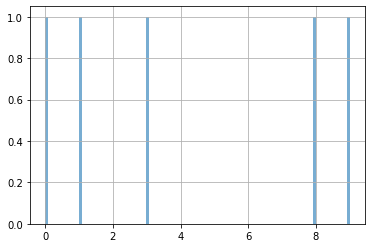

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [14]:
dw.hist(df[feature], bins=100, alpha=0.6)

#### Special Value Encoding

In [15]:
dw.encode_special(df, 'feature1', pd.Interval(2, 8.5), True)

(0    NaN
 1    NaN
 2    3.0
 3    NaN
 4    NaN
 5    NaN
 6    8.0
 7    NaN
 Name: feature1, dtype: float64, 0    0.0
 1    1.0
 2    NaN
 3   -inf
 4    inf
 5    NaN
 6    NaN
 7    9.0
 Name: feature1_encoded, dtype: float64)

In [16]:
dw.encode_special(df, 'feature2', pd.Interval(3, 5), True)

(0    NaN
 1    NaN
 2    NaN
 3    3.0
 4    4.0
 5    5.0
 6    NaN
 7    NaN
 Name: feature2, dtype: float64, 0    0.0
 1    1.0
 2    2.0
 3    NaN
 4    NaN
 5    NaN
 6    6.0
 7    7.0
 Name: feature2_encoded, dtype: float64)

In [17]:
dw.encode_special(df, 'feature1', pd.Interval(2, 8.5), False)

(0    NaN
 1    NaN
 2    3.0
 3    NaN
 4    NaN
 5    NaN
 6    8.0
 7    NaN
 Name: feature1, dtype: float64, None)

In [18]:
dw.encode_special(df, 'feature2', pd.Interval(3, 5), False)

(0    NaN
 1    NaN
 2    NaN
 3    3.0
 4    4.0
 5    5.0
 6    NaN
 7    NaN
 Name: feature2, dtype: float64, None)

In [19]:
df['feature1'], _ = dw.encode_special(df, 'feature1', pd.Interval(2, 8.5), False)

In [20]:
df

,feature1,feature2
0,NaN,0
1,NaN,1
2,3.0,2
3,NaN,3
4,NaN,4
5,NaN,5
6,8.0,6
7,NaN,7


In [23]:
data = [0, 1, 3, -np.inf, np.inf, np.nan, 8, 9]
df = pd.DataFrame(
    {"feature1": data, "feature2": range(len(data))}, index=range(len(data))
)
df['feature1'], df['feature1_encoded'] = dw.encode_special(df, 'feature1', pd.Interval(2, 8.5), True)

In [24]:
df

,feature1,feature2,feature1_encoded
0,NaN,0,0.0
1,NaN,1,1.0
2,3.0,2,NaN
3,NaN,3,-inf
4,NaN,4,inf
5,NaN,5,NaN
6,8.0,6,NaN
7,NaN,7,9.0
